In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
df=pd.read_csv('data.csv')

In [3]:
df.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
2,2059784,9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
3,1302036,b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
4,297180,d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


df.info()

In [6]:
df.shape

(1111742, 30)

# Exploratory Data Analysis

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

In [28]:
df.isnull().sum()

Unnamed: 0         0
Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

<AxesSubplot:>

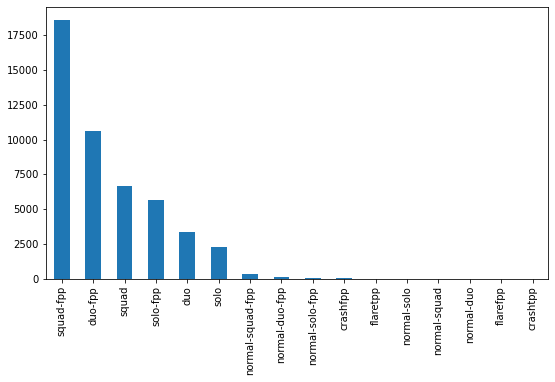

In [87]:
plt.figure(figsize = (9,5))
df.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [19]:
## Unique count of id 
for j in ['Id','groupId','matchId']:
    print(f'Unique {j} count:',df[j].nunique())

Unique Id count: 1111742
Unique groupId count: 870622
Unique matchId count: 47951


In [29]:
m_types = df.loc[:,"matchType"].value_counts().to_frame().reset_index()
m_types.columns = ["Player Type","Player Count"]
m_types

,Player Type,Player Count
0,squad-fpp,438781
1,duo-fpp,249927
2,squad,156573
3,solo-fpp,133854
4,duo,78039
5,solo,45679
6,normal-squad-fpp,4286
7,crashfpp,1581
8,normal-duo-fpp,1400
9,flaretpp,633


# Kills


In [13]:
data=df.copy()

In [72]:
data['kills']=data['kills'].apply(lambda x:"9+" if x>=9 else x)

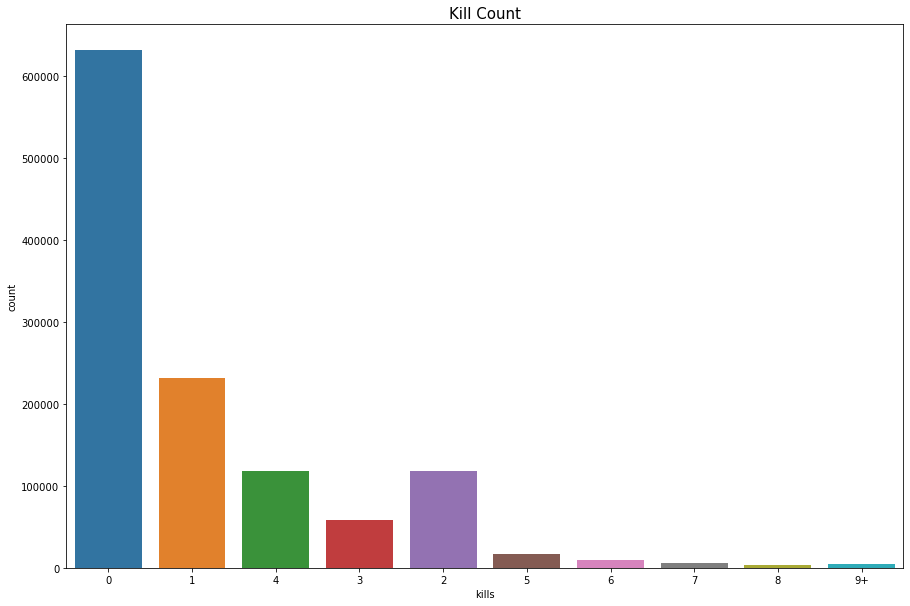

In [73]:
plt.figure(figsize=(15,10))
plt.title("Kill Count",fontsize=15)
sns.countplot(data['kills'].astype('str').sort_values())
ax = sns.countplot(data=data, x="kills")

In [80]:
IQR=df.kills.quantile(0.75)-df.kills.quantile(0.25)
IQR

1.0

In [81]:
lower_bound=df['kills'].quantile(0.25)-(IQR*1.5)
upper_bound=df['kills'].quantile(0.75)+(IQR*1.5)
print(lower_bound), print(upper_bound)

-1.5
2.5


(None, None)

In [98]:
print("{} players ({:.3f}%) have won without a single kill!".format(len(data[data['winPlacePerc']==1]), 100*len(data[data['winPlacePerc']==1])/len(df)))

31853 players (2.865%) have won without a single kill!


### Correlating killing with winplace

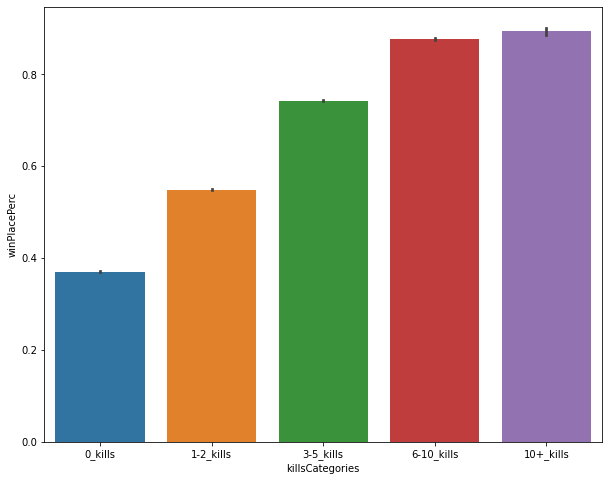

In [103]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(10,8))
sns.barplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

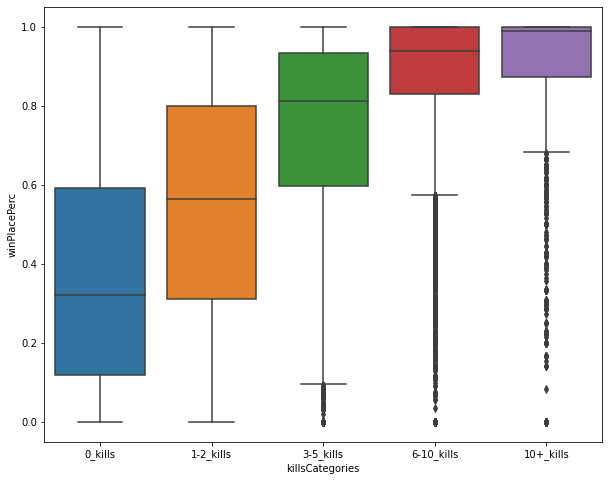

In [10]:
kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(10,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)
plt.show()

### As Number of kills Increase Outliers also increases and you are very close to win the match

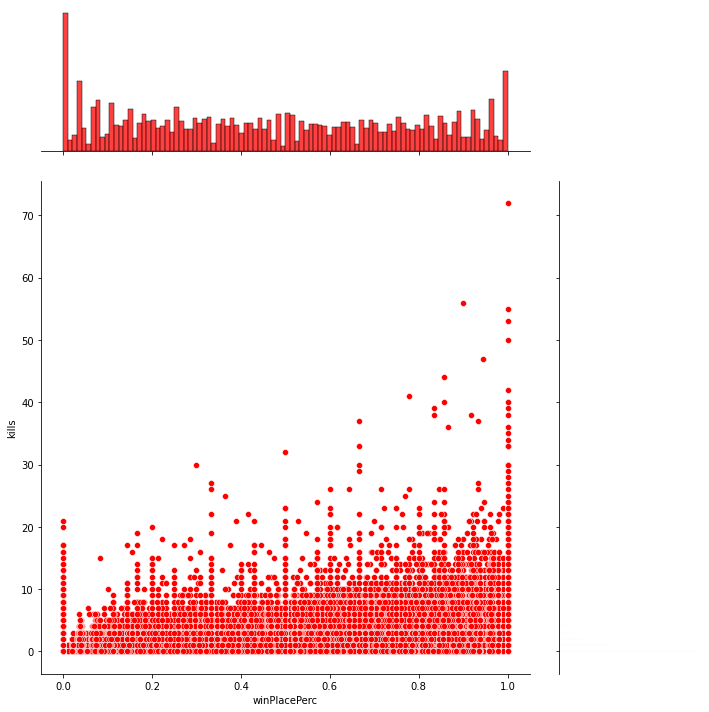

In [25]:
sns.jointplot(x="winPlacePerc", y="kills", data=df, height=10, ratio=3, color="r")
plt.show()

## Apparently killing has cor relation with winning

<AxesSubplot:xlabel='damageCategories', ylabel='winPlacePerc'>

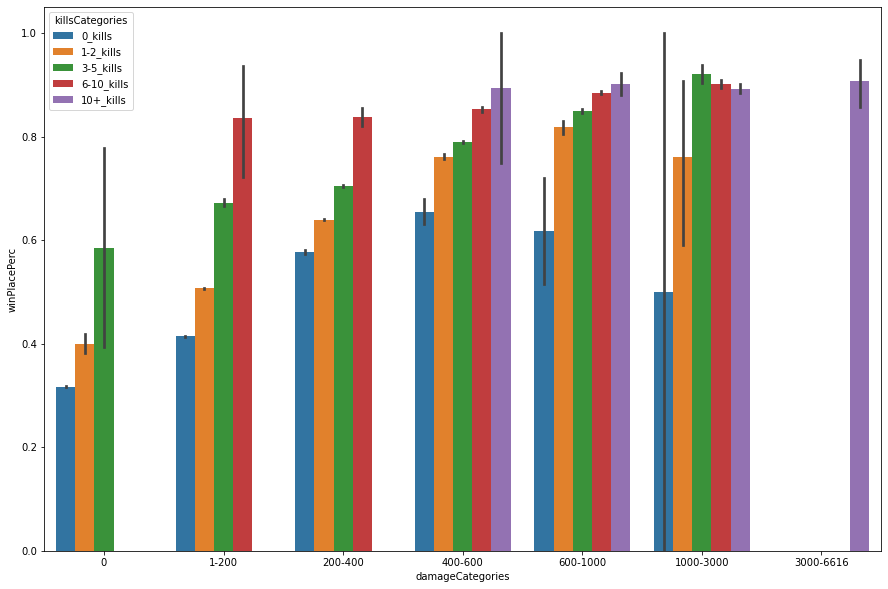

In [128]:
damage = df.copy()
damage_bins=[-1,0,200,400,600,1000,3000,6616]
damage_groups=["0","1-200","200-400","400-600","600-1000","1000-3000","3000-6616"]
damage['damageCategories'] = pd.cut(damage['damageDealt'],damage_bins,labels=damage_groups)
plt.figure(figsize=(15,10))
kill_bins=[-1, 0, 2, 5, 10, 60]
kill_groups=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills']
damage['killsCategories'] = pd.cut(damage['kills'],kill_bins, labels=kill_groups)      
sns.barplot(x="damageCategories", y="winPlacePerc",
              data=damage,hue='killsCategories')

 ### Winner having 10+kills and damage by them is approximately 400-600

### suspicious rows

In [14]:
suspects = df.query('winPlacePerc ==1 & walkDistance ==0').head()
suspects.head()

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
5585,1573958,1ed752158c7bbc,338d6ab3bf5f19,4c6b1a0e4cb346,1,0,369.60,0,1,2,...,0,0.0,0,0.0,2,0,0.0,27,0,1.0
10034,1835951,ac43d9729a0605,c5f3b9e5fe1534,4202c9c526d2ad,0,0,38.48,0,0,0,...,0,0.0,0,0.0,0,0,0.0,6,0,1.0
10092,3803166,861fd334addd94,15ba030fd830cc,ed41b4340cd7af,1,0,524.40,0,0,2,...,0,0.0,0,0.0,0,0,0.0,14,1500,1.0
11952,1514773,974ce8673463bd,12ede3fef1318a,832accc40ad0e1,0,0,12.00,0,0,0,...,0,0.0,0,0.0,0,0,0.0,2,0,1.0
12242,2607907,62b4377d5c88e5,41ee1c036b0ffa,7d9d4b051fd1be,0,0,22.52,0,0,0,...,0,0.0,0,0.0,0,0,0.0,11,0,1.0


Person who walks zero distance but also wins the match

# Analysis of Running on winning percentage

In [ ]:
print("{} players ({:.3f}%) drived for 0 meters. This means that they don't have a driving licence yet.".format(len(data[data['rideDistance'] == 0]), 100*len(data[data['rideDistance']==0])/len(df)))

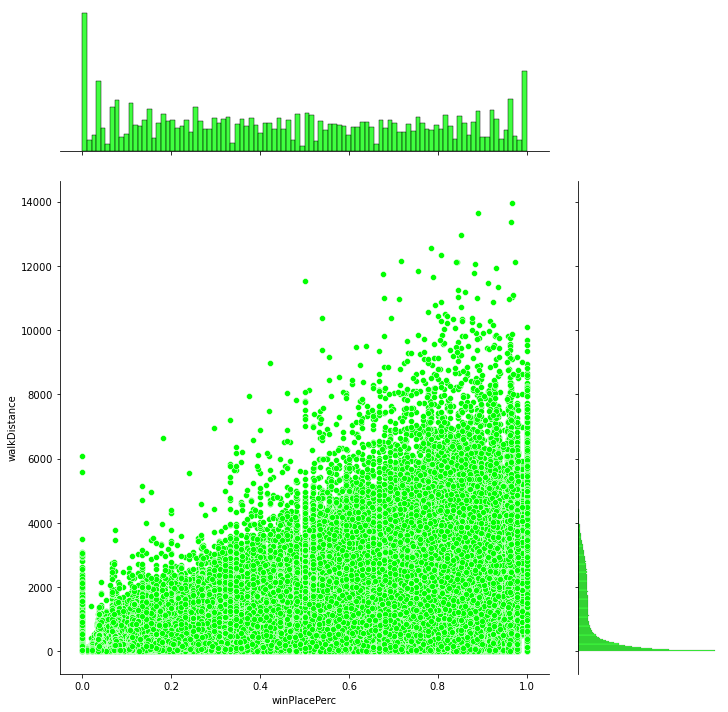

In [22]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="lime")

### Apparently walking has a high correlation with winPlacePerc.

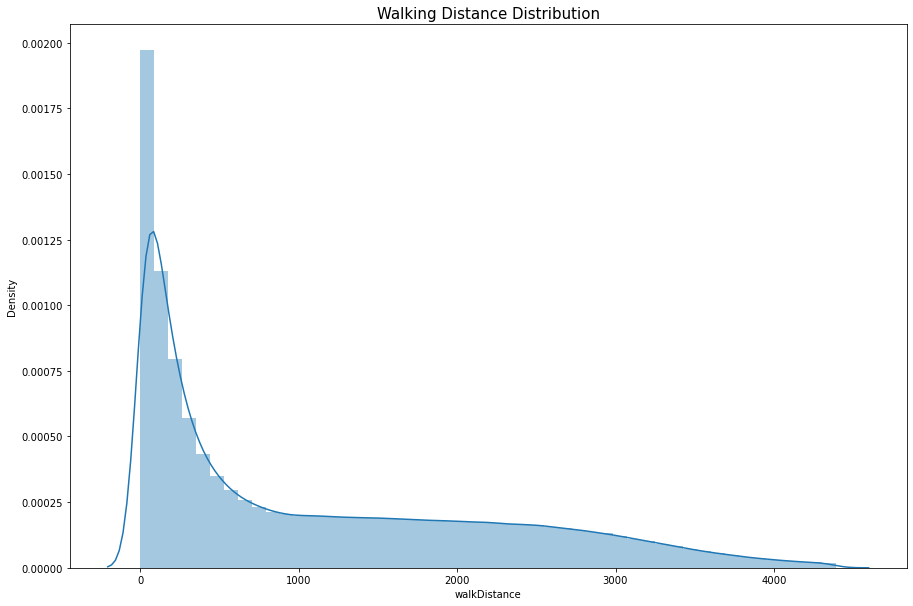

In [23]:
data = data[data['walkDistance'] < df['walkDistance']]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['walkDistance'])
plt.show()

### Apparently walking has a high correlation with winPlacePerc and winnres have a good walking distance.

In [30]:
print("{} players ({:.3f}%) walked 0 meters. This means that they die before even taking a step.".format(len(data[data['walkDistance'] == 0]), 100*len(data[data['walkDistance']==0])/len(df)))

24936 players (2.243%) walked 0 meters. This means that they die before even taking a step.


# Analysis of Riding

In [34]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, riders ride {}m.".format(data['rideDistance'].mean(), data['rideDistance'].quantile(0.99), data['rideDistance'].max()))

The average person drives for 599.7m, 99% of people have drived 6973.0m or less, riders ride 35400.0m.


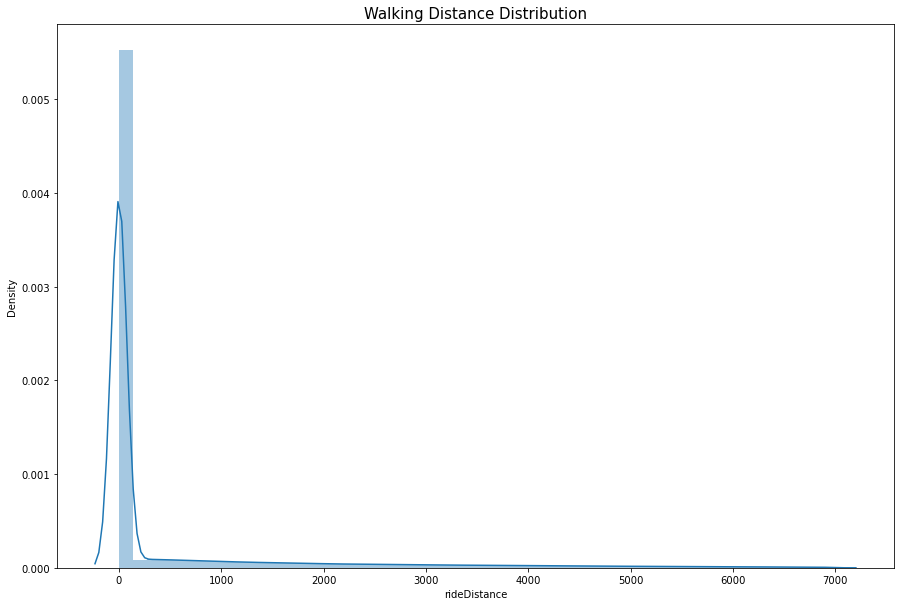

In [37]:
data = data[data['rideDistance'] < df['rideDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data['rideDistance'])
plt.show()

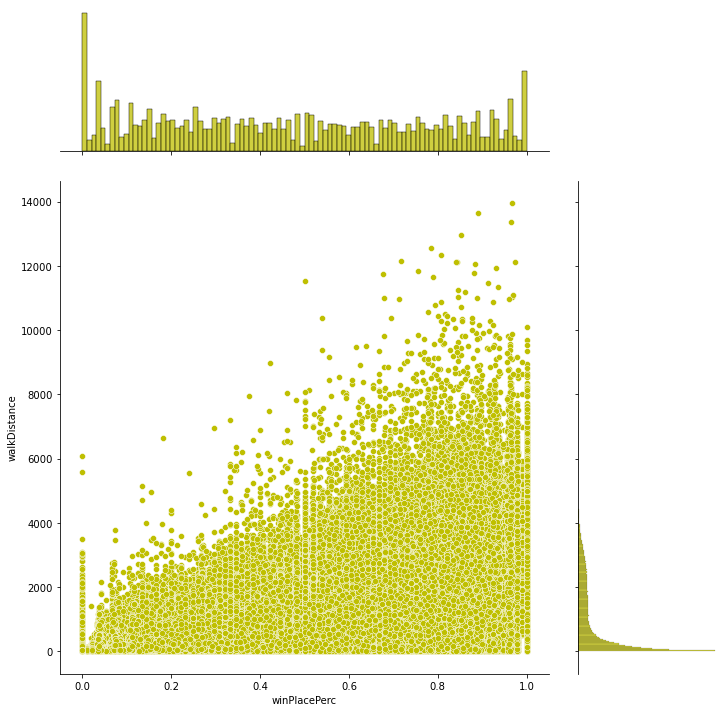

In [39]:
sns.jointplot(x="winPlacePerc", y="walkDistance",  data=df, height=10, ratio=3, color="y")

### It seems like linear relationship but it has more scattered. If a player is able to destroy the vechile it indicates that he is good player

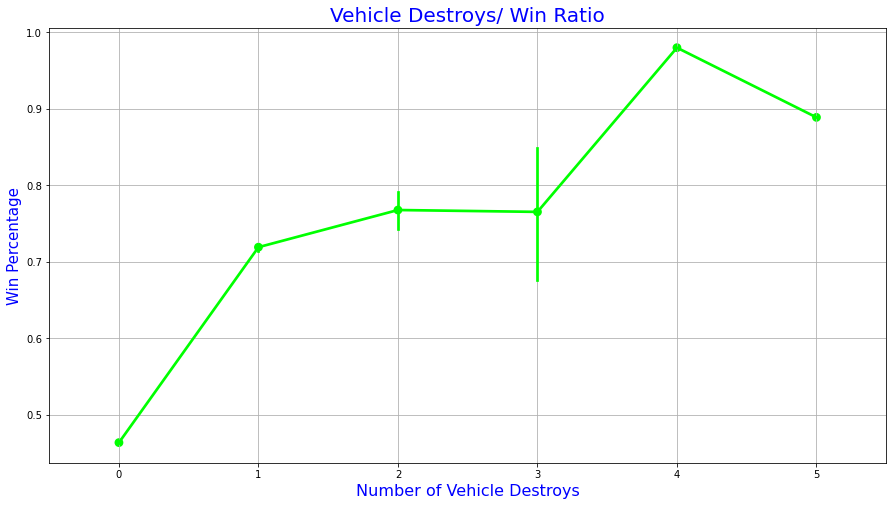

In [41]:
f,ax1 = plt.subplots(figsize =(15,8))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='lime',alpha=0.5)
plt.xlabel('Number of Vehicle Destroys',fontsize = 16,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Vehicle Destroys/ Win Ratio',fontsize = 20,color='blue')
plt.grid()
plt.show()

### Destroying the Vechiles increasing the chance of Winning more over he is skilled

# Analysis of healing

In [44]:
print("In game person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("In game person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

In game person uses 1.3 heal items, 99% of people use 12.0 or less, while the doctor used 73.
In game person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 24.


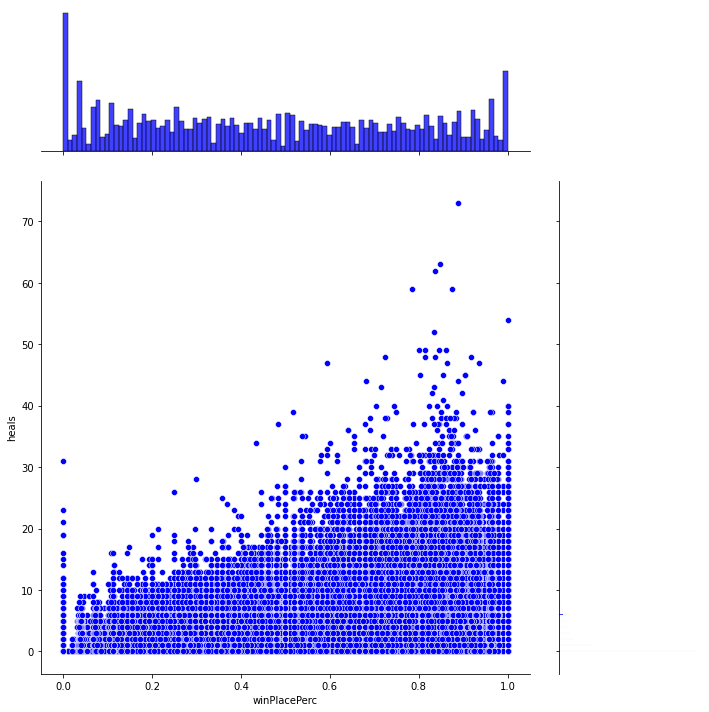

In [46]:
sns.jointplot(x="winPlacePerc", y="heals", data=df, height=10, ratio=3, color="blue")
plt.show()

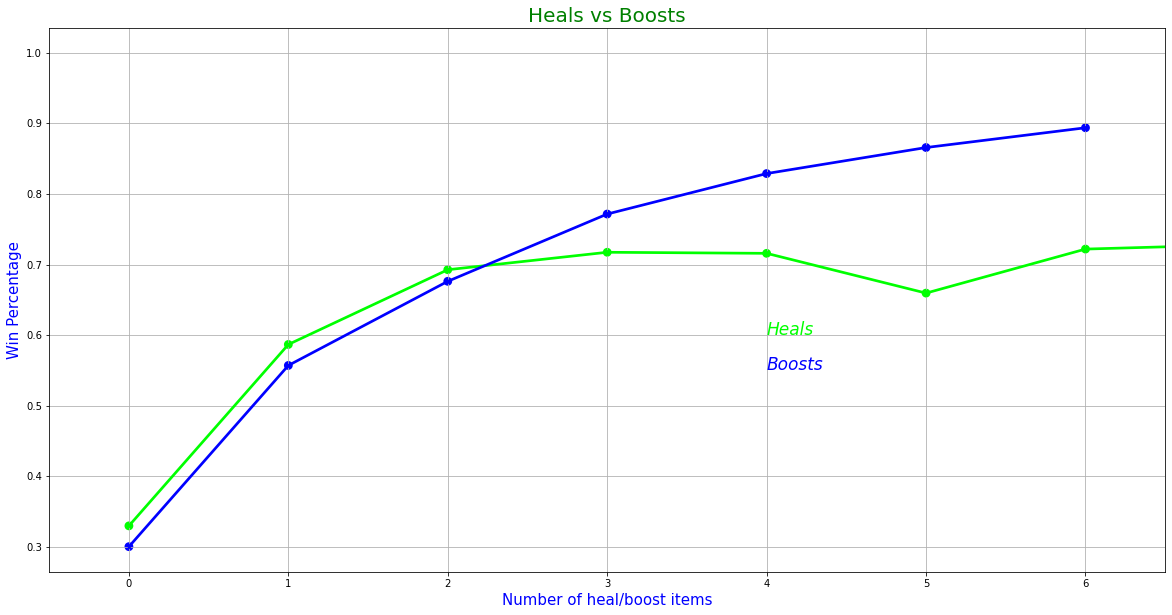

In [47]:
ata = data[data['heals'] < data['heals'].quantile(0.99)]
data = data[data['boosts'] < data['boosts'].quantile(0.99)]

f,ax1 = plt.subplots(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data,color='lime',alpha=0.5)
sns.pointplot(x='boosts',y='winPlacePerc',data=data,color='blue',alpha=0.5)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='green')
plt.grid()
plt.show()

### Healing and Boosting increase would help us for winnning

## checking for outlier row

In [50]:
df[df['winPlacePerc'].isnull()]

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
184895,2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,...,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [55]:
data['Total Distance']=data['rideDistance']+df['walkDistance']+df['swimDistance']

### total distance travelled by a player which is the sum total of rideDistance,walkdistance and swimdistance

Text(0.5, 0, 'Distribution')

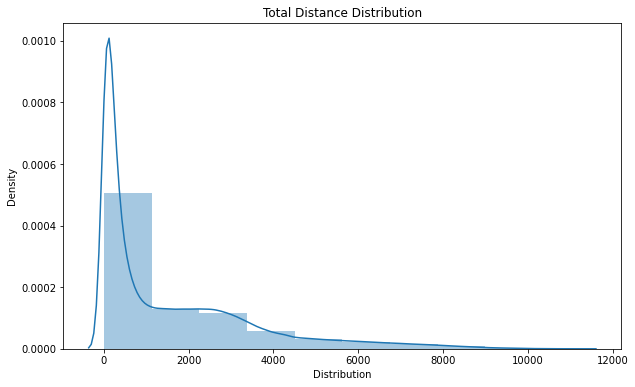

In [56]:
plt.figure(figsize=(10, 6))
# plt.hist(distances['Total Distance'], bins=20)
sns.distplot(data['Total Distance'], bins=10)
plt.title("Total Distance Distribution")
plt.xlabel("Distribution")

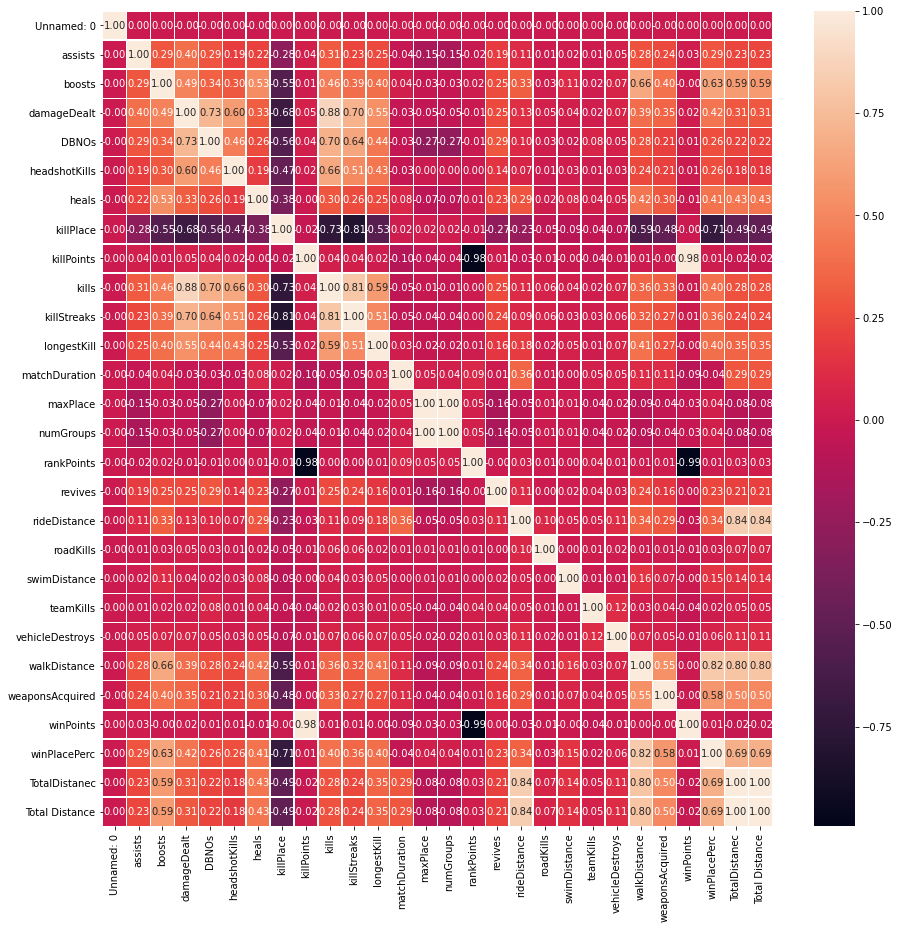

In [57]:
f,ax = plt.subplots(figsize=(15, 15))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.2f',ax=ax)
plt.show()